<a href="https://colab.research.google.com/github/juliuserbach/Semantic-Features/blob/master/Kitti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pykitti

In [2]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=EA356294C6263A37&resid=EA356294C6263A37%21100433&authkey=APrMUGQyaB4np4Q" -O kitti_dataset.zip

--2020-04-03 12:03:54--  https://onedrive.live.com/download?cid=EA356294C6263A37&resid=EA356294C6263A37%21100433&authkey=APrMUGQyaB4np4Q
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://xwp44a.am.files.1drv.com/y4mNoRjRWNplKbPb_Q0sxZCsyJc-LFLkZ7pxfoa6YxaO1eDKWNkvtLARiopnxgPfRRd4MtXhTuZD10YTVaRlWRb9rLVu0eesjxS4eUiuj_irRrQeFxenlRfcQciiGQjOaZjYGQegygigoxXMlDQH4mHOqAszQnk6RWnvn72XYE4bwgtZUfmz_-WSLyWC3x9wu5yS_KeyvKO2zewYr4ytPff4Q/kitti_dataset.zip?download&psid=1 [following]
--2020-04-03 12:03:55--  https://xwp44a.am.files.1drv.com/y4mNoRjRWNplKbPb_Q0sxZCsyJc-LFLkZ7pxfoa6YxaO1eDKWNkvtLARiopnxgPfRRd4MtXhTuZD10YTVaRlWRb9rLVu0eesjxS4eUiuj_irRrQeFxenlRfcQciiGQjOaZjYGQegygigoxXMlDQH4mHOqAszQnk6RWnvn72XYE4bwgtZUfmz_-WSLyWC3x9wu5yS_KeyvKO2zewYr4ytPff4Q/kitti_dataset.zip?download&psid=1
Resolving xwp44a.am.files.1drv.com (xwp44a.am.fi

In [0]:
!unzip -qq kitti_dataset.zip -d data

In [0]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import pykitti

basedir = '/content/data/dataset'

# Specify the dataset to load
sequence = '04'

# Load the data. Optionally, specify the frame range to load.
# dataset = pykitti.odometry(basedir, sequence)
dataset = pykitti.odometry(basedir, sequence)


Sequence: 04

Frame range: None

RGB stereo pair baseline [m]: 0.5379044891402804

First timestamp: 0:00:00

Second ground truth pose:
[[  1.      -0.0042   0.0035  -0.0966]
 [  0.0042   1.      -0.0042  -5.9078]
 [ -0.0035   0.0042   1.     313.0445]
 [  0.       0.       0.       1.    ]]


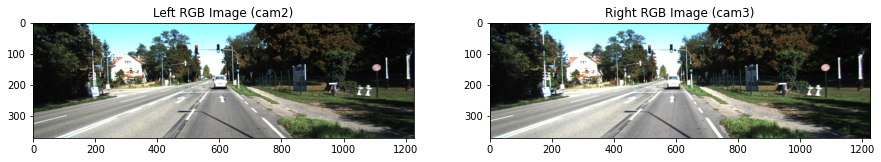

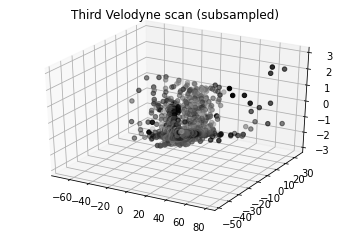

In [21]:
# Grab some data
second_pose = dataset.poses[220]
first_rgb = dataset.get_rgb(219)
first_cam2 = dataset.get_cam2(219)
third_velo = dataset.get_velo(221)

# Display some of the data
np.set_printoptions(precision=4, suppress=True)
print('\nSequence: ' + str(dataset.sequence))
print('\nFrame range: ' + str(dataset.frames))

print('\nRGB stereo pair baseline [m]: ' + str(dataset.calib.b_rgb))

print('\nFirst timestamp: ' + str(dataset.timestamps[0]))
print('\nSecond ground truth pose:\n' + str(second_pose))

f, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].imshow(first_cam2)
ax[0].set_title('Left RGB Image (cam2)')

ax[1].imshow(first_rgb[1])
ax[1].set_title('Right RGB Image (cam3)')

f2 = plt.figure()
ax2 = f2.add_subplot(111, projection='3d')
# Plot every 100th point so things don't get too bogged down
velo_range = range(0, third_velo.shape[0], 100)
ax2.scatter(third_velo[velo_range, 0],
            third_velo[velo_range, 1],
            third_velo[velo_range, 2],
            c=third_velo[velo_range, 3],
            cmap='gray')
ax2.set_title('Third Velodyne scan (subsampled)')

plt.show()